In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import seaflowpy as sfp
import mpld3 

import glob
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})



/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [28]:
def get_filter_line(inst, regime_in, regime_out, bead_coords, calib):
    slopes = pd.DataFrame()
    intercept = pd.DataFrame()
    bead_coord = pd.DataFrame()
    
       
    bead_coord['fsc_small'] = bead_coords.fsc_small[(bead_coords['inst']==inst) & (bead_coords['regime']==regime_out)]
    bead_coord['D2'] = bead_coords.D2[(bead_coords['inst']==inst) & (bead_coords['regime']==regime_out)]
    #bead_coord['D1'] = bead_coords.D1[(bead_coords['inst']==inst) & (bead_coords['regime']==regime)]
    
    slopes['slope_S'] = calib.slope_S[(calib['inst']==inst) & (calib['regime']==regime_in)]
    slopes['slope_B'] = calib.slope_B[(calib['inst']==inst) & (calib['regime']==regime_in)]
    
    
    # function to find the intercept given the coordinates of the 1um beads
    intercept['S'] = bead_coord['D2'].values - slopes['slope_S'].values*bead_coord['fsc_small']
    intercept['B'] = bead_coord['D2'].values - slopes['slope_B'].values*bead_coord['fsc_small']

    return intercept, slopes

In [4]:
# set the wdirectory where the data is stored

datadir = "/Volumes/ceg/Sophie/bead_calibration/"

# select instrument
inst = 751
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [ ]:
# best guess of the points needed for the filter function
# this is for the 751 oligo test
guess = pd.DataFrame()
guess['fsc_small'] = [62100, 57600, 58000, 53500, 48200, 38300, 20200]
guess['D2'] = [48800, 39900, 34000, 26200, 23500, 16700, 5800]
guess['bead'] = [5.7,3.1, 1.83, 1.0, 0.75, 0.5, 0.3]

# try to fit a polynomial to bead data
z = np.polyfit(guess['fsc_small'], guess['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess = guess.sort(['bead'], ascending = 1)

small = guess[guess['bead']<=1]
big = guess[guess['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

In [ ]:
% matplotlib inline

fig1 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)

#plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess['fsc_small'], guess['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

#fig1.savefig('../figures/751_oligo_beads.png', bbox_inches='tight')

In [ ]:
# select instrument
inst = 751
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
#regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [ ]:
# best guess points for 751 coastal
#
guess2 = pd.DataFrame()
guess2['fsc_small'] = [51000, 46200, 41400, 36300, 25000, 8000]
guess2['D2'] = [48200, 38200, 25800, 22400, 15300, 4800]
guess2['bead'] = [5.7, 3.1, 1.0, 0.75, 0.5, 0.31]

# try to fit a polynomial to bead data
z = np.polyfit(guess2['fsc_small'], guess2['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess2 = guess2.sort(['bead'], ascending = 1)

small = guess2[guess2['bead']<=1]
big = guess2[guess2['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

In [ ]:
fig2 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)

#plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess2['fsc_small'], guess2['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

#fig2.savefig('../figures/751_coastal_beads.png', bbox_inches='tight')

In [ ]:
# select instrument
inst = 740
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [ ]:
# best guess points for 751 oligo
#
guess3 = pd.DataFrame()
guess3['fsc_small'] = [61300, 60300, 56000, 49000, 43500, 30700]
guess3['D2'] = [55900, 50600, 39900, 30800, 24400, 14100]
guess3['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess3['fsc_small'], guess3['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess3 = guess3.sort(['bead'], ascending = 1)

small = guess3[guess3['bead']<=1]
big = guess3[guess3['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

In [ ]:
% matplotlib inline

fig3 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)

#plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess3['fsc_small'], guess3['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

#fig3.savefig('../figures/740_oligo_beads.png', bbox_inches='tight')

In [ ]:
# select instrument
inst = 740
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
#regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [ ]:
# % matplotlib qt

# fig1 = plt.figure(figsize=(20,20))

# num_cols = len(files)

# cm = plt.get_cmap('gist_rainbow')
# #for i in range(num_cols):
# #    color = cm(1.*i/num_cols)

# cc = 0
# for f in files:
#     print f
#     bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
#     plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
#     cc += 1

# plt.xlabel('fsc_small')
# plt.ylabel('D2')
# plt.legend(loc = 'lower right')
# plt.show()

In [ ]:
# best guess points for 751 coastal
#
guess4 = pd.DataFrame()
guess4['fsc_small'] = [51800, 46000, 46500, 38100, 33200, 19700]
guess4['D2'] = [55200, 48600, 38200, 25100, 23200, 14000]
guess4['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess4['fsc_small'], guess4['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess4 = guess4.sort(['bead'], ascending = 1)

small = guess4[guess4['bead']<=1]
big = guess4[guess4['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

In [ ]:
% matplotlib inline

fig4 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)

#plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess4['fsc_small'], guess4['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

#fig4.savefig('../figures/740_coastal_beads.png', bbox_inches='tight')

In [ ]:
# select instrument
inst = 989
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
#regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [ ]:
# % matplotlib qt

# fig1 = plt.figure(figsize=(20,20))

# num_cols = len(files)

# cm = plt.get_cmap('gist_rainbow')
# #for i in range(num_cols):
# #    color = cm(1.*i/num_cols)

# cc = 0
# for f in files:
#     print f
#     bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
#     plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
#     cc += 1

# # plt.xlabel('fsc_small')
# plt.ylabel('D2')
# plt.legend(loc = 'lower right')
# plt.show()

In [ ]:
# best guess points for 989 coastal
#
guess5 = pd.DataFrame()
guess5['fsc_small'] = [51100, 47200, 45300, 40700, 35700, 23700]
guess5['D2'] = [38800, 34800, 28300, 22400, 19000, 7800]
guess5['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess5['fsc_small'], guess5['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess5 = guess5.sort(['bead'], ascending = 1)

small = guess5[guess5['bead']<=1]
big = guess5[guess5['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

In [ ]:
% matplotlib inline

fig5 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)

#plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess5['fsc_small'], guess5['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

#fig5.savefig('../figures/989_coastal_beads.png', bbox_inches='tight')

In [ ]:
# select instrument
inst = 989
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [ ]:
# % matplotlib qt

# fig1 = plt.figure(figsize=(20,20))

# num_cols = len(files)

# cm = plt.get_cmap('gist_rainbow')
# #for i in range(num_cols):
# #    color = cm(1.*i/num_cols)

# cc = 0
# for f in files:
#     print f
#     bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
#     plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
#     cc += 1

# plt.xlabel('fsc_small')
# plt.ylabel('D2')
# plt.legend(loc = 'lower right')
# plt.show()

In [ ]:
# best guess points for 989 oligo
#
guess6 = pd.DataFrame()
guess6['fsc_small'] = [60400, 55200, 54900, 50800, 45900, 35200]
guess6['D2'] = [41600, 33000, 31300, 24800, 20500, 10600]
guess6['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess6['fsc_small'], guess6['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess6 = guess6.sort(['bead'], ascending = 1)

small = guess6[guess6['bead']<=1]
big = guess6[guess6['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

In [ ]:
% matplotlib inline

fig6 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)

#plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess6['fsc_small'], guess6['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

#fig6.savefig('../figures/989_oligo_beads.png', bbox_inches='tight')

/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_0.75.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-18_751_coastal_0.31um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_0.5.evt


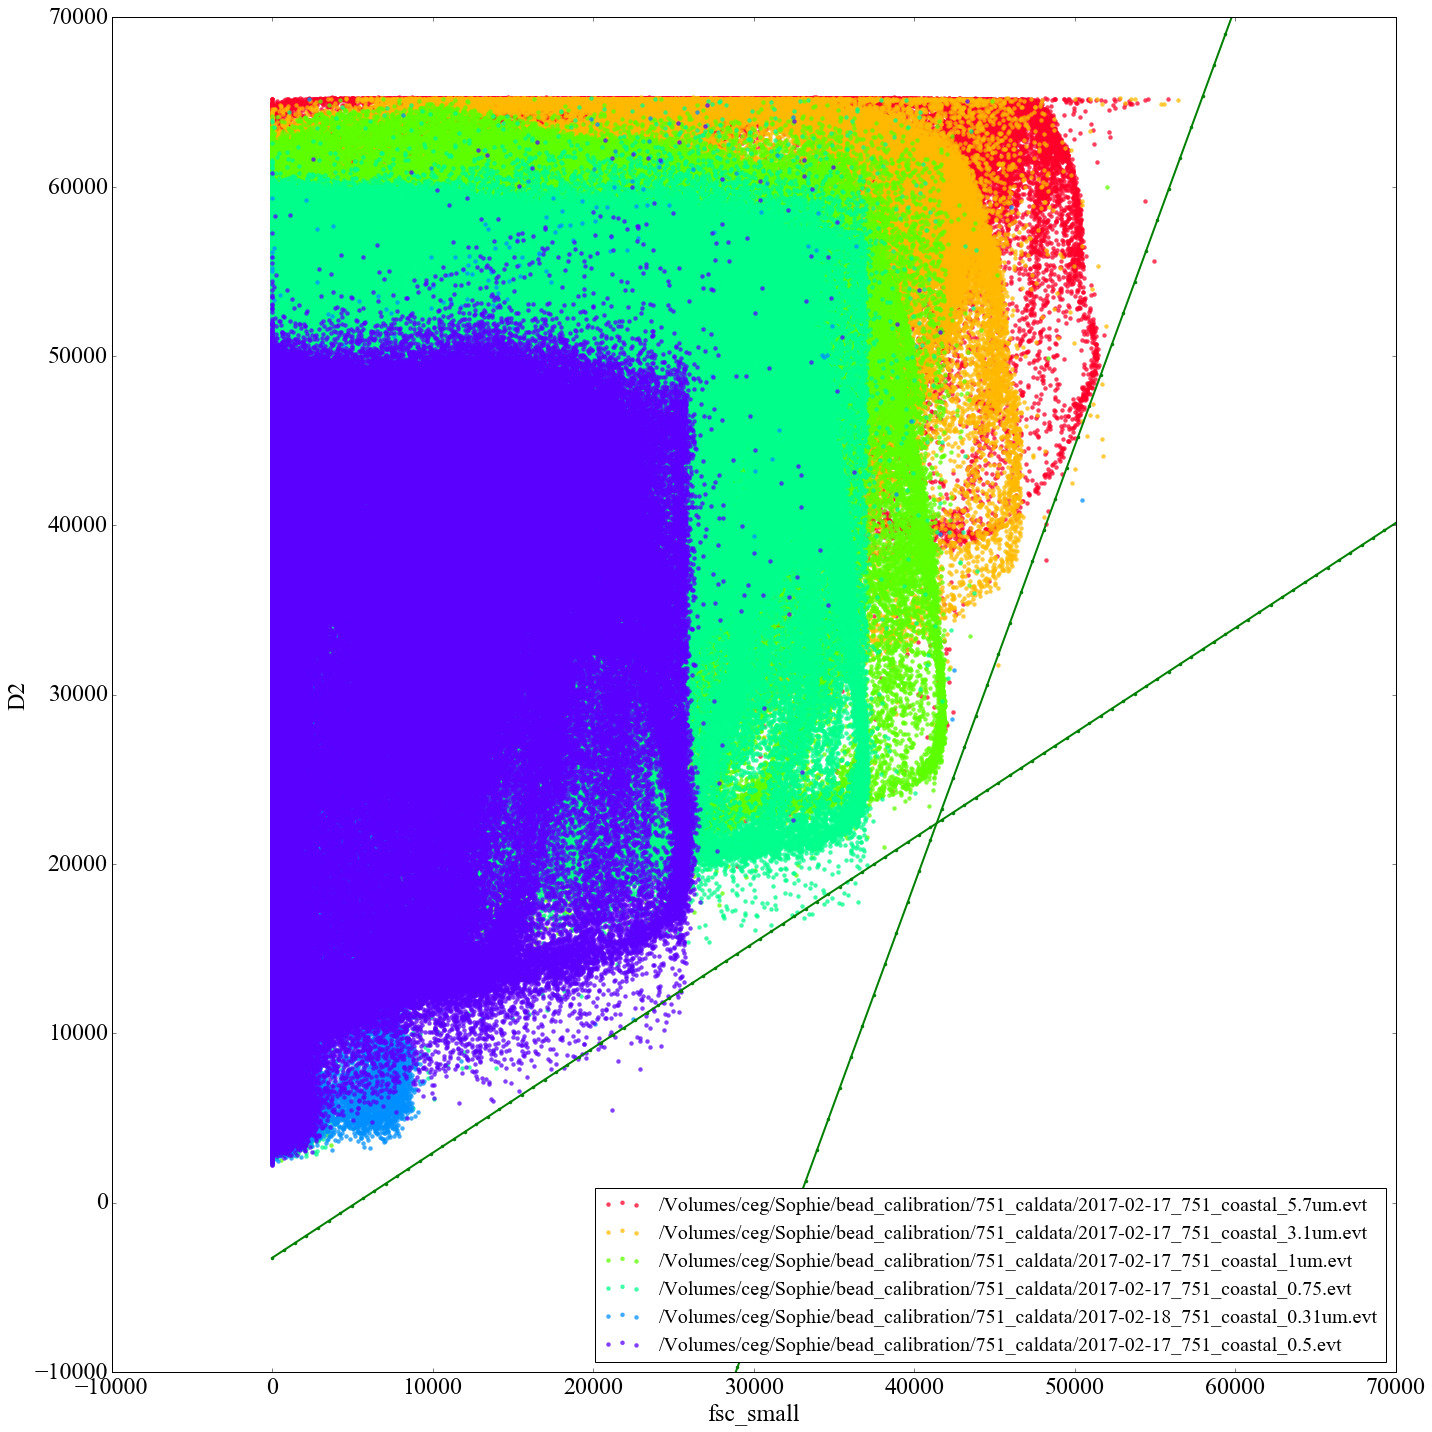

In [30]:
# now see how well the slopes from different regimes fit

calib = pd.DataFrame()

calib['inst'] = [740, 740, 751, 751, 989, 989]
calib['regime'] = ['coastal', 'oligo', 'coastal', 'oligo', 'coastal', 'oligo']
calib['slope_S'] = [0.62, 0.89, 0.63, 0.62, 0.87, 0.91]
calib['slope_B'] = [2.17, 1.95, 2.3, 2.59, 1.64, 1.75]

bead_coords = pd.DataFrame()

bead_coords['inst'] = [740, 740, 751, 751, 989, 989]
bead_coords['regime'] = ['oligo', 'coastal', 'oligo', 'coastal', 'oligo', 'coastal']
bead_coords['fsc_small'] = [49000, 38100, 53500, 41400, 50800, 40700]
bead_coords['D2'] = [24400, 23200, 23500, 22400, 20500, 19000]

############################################################################################################

inst = 751
regime_in = 'oligo'
regime_out = 'coastal'

instdir = "%3d_caldata" % inst
indir = "%s%s" % (datadir, instdir)

files = glob.glob('%s/*%s*.evt' % (indir, regime_out))

intercept, slopes = get_filter_line(inst, regime_in, regime_out, bead_coords, calib)

xp = np.linspace(0, 7e04, 100)

fline_S = (slopes['slope_S'].values*xp) + intercept['S'].values
fline_B = (slopes['slope_B'].values*xp) + intercept['B'].values

fig7 = plt.figure(figsize=(20,20), dpi = 600)

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f, alpha = 0.75)
    cc += 1

plt.xlabel('fsc_small', fontsize = 24)
plt.ylabel('D2', fontsize = 24)
plt.legend(loc = 'lower right', fontsize = 20)

plt.tick_params(axis='both', which='major', labelsize=24)


plt.plot(xp, fline_S,'.-g', lw =2)
plt.plot(xp, fline_B,'.-g', lw =2)

plt.axis([-10000, 70000, -10000, 70000])
plt.show()

    